In [175]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from math import sqrt

In [177]:
df = pd.read_csv("VND Historical Data.csv")

In [178]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/1/2017,16511.9,16477.2,16615.9,16338.4,1060000.0,0.01
1,12/4/2017,16997.5,16720.0,17309.7,16615.9,1600000.0,0.03
2,12/5/2017,16303.7,16997.5,16997.5,16303.7,2360000.0,-0.04
3,12/6/2017,16234.4,16234.4,16373.1,15748.7,2620000.0,0.00
4,12/7/2017,15818.1,16303.7,16338.4,15679.3,1070000.0,-0.03


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1243 non-null   object 
 1   Price     1243 non-null   float64
 2   Open      1243 non-null   float64
 3   High      1243 non-null   float64
 4   Low       1243 non-null   float64
 5   Vol.      1243 non-null   float64
 6   Change %  1243 non-null   float64
dtypes: float64(6), object(1)
memory usage: 68.1+ KB


In [180]:
df.describe()

,Price,Open,High,Low,Vol.,Change %
count,1243.000000,1243.000000,1243.000000,1243.000000,1.243000e+03,1243.000000
mean,14699.721641,14689.380290,14997.256557,14388.769429,8.723458e+06,0.000660
std,8437.740722,8457.337346,8657.608695,8259.927480,1.039326e+07,0.036199
min,2578.000000,2529.800000,2602.100000,2517.700000,5.055000e+04,-0.590000
25%,8209.500000,8194.700000,8224.300000,8061.050000,9.467050e+05,-0.010000
50%,15521.000000,15567.600000,15782.900000,15194.700000,2.790000e+06,0.000000
75%,20397.250000,20395.750000,20813.300000,19996.250000,1.494000e+07,0.020000
max,34784.300000,35078.200000,36254.000000,34294.400000,6.549000e+07,0.100000


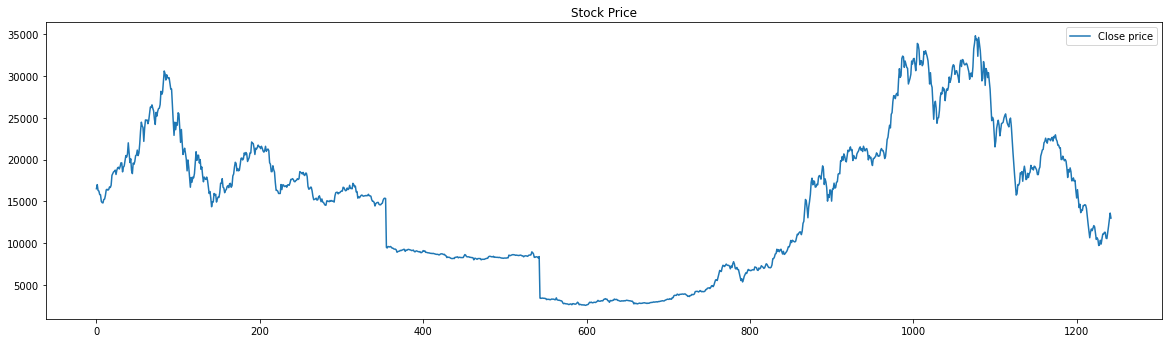

In [181]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Stock Price')
plt.plot(df.Price,label='Close price')
plt.legend()


In [182]:
stepwise_fit = auto_arima(df['Price'], trace = True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19396.918, Time=2.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19398.521, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19394.201, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19393.857, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19396.549, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19395.180, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=19395.164, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19397.118, Time=1.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=19391.886, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=19393.206, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=19393.186, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=19392.231, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=19395.137, Time=0.38 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 5.123 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1243
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -9693.943
Date:                Wed, 04 Jan 2023   AIC                          19391.886
Time:                        19:20:52   BIC                          19402.135
Sample:                             0   HQIC                         19395.740
                               - 1243                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0737      0.019      3.873      0.000       0.036       0.111
sigma2      3.529e+05   5172.208     68.227      0.000    3.43e+05    3.63e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              9100.08
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                            -1.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [183]:
def split_data(data, test_split):
    length = len(data)
    size = round(length * (1 - test_split))
    train, test = data[:size], data[size:]
    print('train:', len(train))
    print('test:', len(test))
    return train, test

In [184]:
test_split = 0.1
train, test = split_data(df, test_split)

train: 1119
test: 124


In [185]:
import warnings
warnings.filterwarnings("ignore")

In [186]:
model = sm.tsa.arima.ARIMA(train['Price'], order = (4,1,0))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 1119
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -8713.911
Date:                Wed, 04 Jan 2023   AIC                          17437.822
Time:                        19:20:52   BIC                          17462.919
Sample:                             0   HQIC                         17447.309
                               - 1119                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0493      0.020      2.475      0.013       0.010       0.088
ar.L2         -0.0430      0.022     -1.971      0.049      -0.086      -0.000
ar.L3          0.0075      0.021      0.353      0.724      -0.034       0.049
ar.L4          0.0429      0.020      2.175      0.030       0.004       0.082
sigma2      3.453e+05   5001.132     69.035      0.000    3.35e+05    3.55e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             11346.45
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                            -1.47
Prob(H) (two-sided):                  0.09   Kurtosis:                        18.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [187]:
start = len(train)
end = len(train) + len(test) -1
pred = model.predict(start = start, end = end, typ = 'levels')

print(pred)
pred.index = df.index[start: end + 1]

1119    24724.699331
1120    24679.322364
1121    24673.445838
1122    24709.588298
1123    24712.340332
            ...     
1238    24710.412918
1239    24710.412918
1240    24710.412918
1241    24710.412918
1242    24710.412918
Name: predicted_mean, Length: 124, dtype: float64


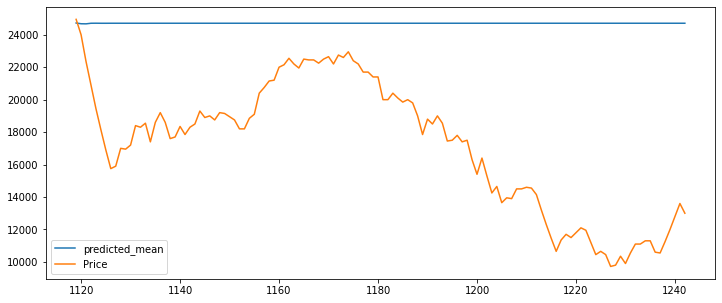

In [188]:
plt.figure(figsize = (12,5))
pred.plot(legend = True)
test['Price'].plot(legend= True)

In [189]:
# using autoarima to get best predictions
step= auto_arima(df.Price, trace=True)
step.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19396.918, Time=2.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19398.521, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19394.201, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19393.857, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19396.549, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19395.180, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=19395.164, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19397.118, Time=0.85 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=19391.886, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=19393.206, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=19393.186, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=19392.231, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=19395.137, Time=0.41 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 5.084 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1243
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -9693.943
Date:                Wed, 04 Jan 2023   AIC                          19391.886
Time:                        19:20:57   BIC                          19402.135
Sample:                             0   HQIC                         19395.740
                               - 1243                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0737      0.019      3.873      0.000       0.036       0.111
sigma2      3.529e+05   5172.208     68.227      0.000    3.43e+05    3.63e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              9100.08
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                            -1.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [190]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

mse =  mean_squared_error(pred, test['Price'])
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(pred, test['Price'])
print("RMSE: ", rmse)
print("MAPE: ", mape * 100)

RMSE:  8557.816363439126
MAPE:  30.5333841564305
